In [18]:
# For Creating Networks

import networkx as nx
import pandas as pd

# For drawing Graphs
import matplotlib.pyplot as plt

# For generating random color
import random

G = nx.Graph()

In [19]:
# { Category1 -> [Movies with Category 1],Category2 -> [Movies with Category 2]...... }
categories = {}

In [20]:
df = pd.read_csv("./netflix_db.csv")
## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [35]:
# Iterate through the dataframe
for index, row in df.iterrows():
    for x in row['listed_in'].split(','):
        if x in categories:
            categories[x].append(row['title'])
        else:
            categories[x] = []
print(len(categories))

72


 International Movies


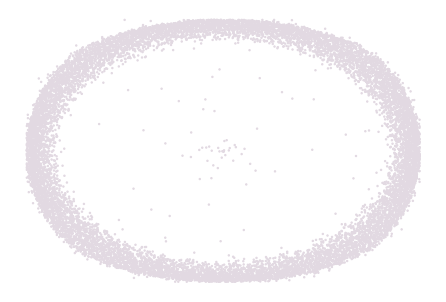

In [51]:
# plotting all categories in a network
cnt = 0

mx_name,mx_cnt = "",0
values = []
for x in categories:
    # Generating random color
    pass

for x in categories:
    #drawing the output to the console
    H = nx.Graph()
    H.add_nodes_from(categories[x])
    if (len(categories[x])>mx_cnt):
        mx_name = x
        mx_cnt = len(categories[x])
    y = random.uniform(0,1)
    values = [y]*len(H.nodes())
    nx.draw(H,node_size=2,cmap = plt.get_cmap('twilight_r'),node_color = values)

print(mx_name)

In [47]:
plt.show()